<img src="images/picto_transparent.png" alt="CARS logo" width="200" align="right"/>

# CARS Tutorial

CARS Team





# Outline

* Tutorial preparation
* CARS context
* 3D photogrammetry basics
* CARS high level design
* CARS quickstart
* CARS CLI examples
* CARS Step by step framework manipulation
* CARS stereo matching with AI improvement


<img src="images/picto_transparent.png" alt="CARS logo" width="100" align="right"/>

# Tutorial preparation

## Docker preparation

Check Docker install: 
    
    docker -v

Get CARS tutorial Docker:

    docker pull cars-tutorial

Show docker images:

    docker images

You should get **cnes/cars** , **cnes/cars-jupyter**, **cnes/cars-tutorial** docker images. 
 


## Cars tutorial and jupyter dockers run

Run tutorial :
    
    docker run -p 8000:8000 cnes/cars-tutorial

Go to [http://localhost:8000](http://localhost:8000) for this tutorial.

Run jupyter notebook:

    docker run -p 8888:8888 cnes/cars-jupyter

Go to the provided output URL and navigate into CARS tutorials notebooks. 
The URL must be of this kind with a token: [http://localhost:8888](http://localhost:8888) 


<img src="images/picto_transparent.png" alt="CARS logo" width="100" align="right"/>

# CARS context

## CARS, a satellite multi view stereo pipeline

CARS produces Digital Surface Models from satellite imaging by photogrammetry.

Main goals: 

- robust and distributed tool for operational pipelines.
- capitalizing 3D developments
- prototyping, tests, r&d evaluation

*Be aware that CARS is new and evolving to maturity with CNES roadmaps*

License:  Apache-2.0

<img src="images/picto_transparent.png" alt="CARS logo" width="200" align="right"/>

Web sites:

- [https://github.com/cnes/cars/](https://github.com/cnes/cars/)
- [https://cars.readthedocs.io/](https://cars.readthedocs.io/)



    

## CARS ?

<table><tr>
<td> 
  <p align="center" style="padding: 10px">
    <img alt="Sat sensors" src="images/animation_sat.gif" width="300">
  </p> 
</td>
<td> 
  <p align="center">
    <img alt="Overview elevation" src="images/overview_dsm_3d.gif" width="300">
  </p> 
</td>
</tr>
<tr>
<td>
    <em>Sensors images</em>
</td>
<td>
    <em>Elevation model</em>
</td> 
</tr>
</table>


## Projects context

- [CO3D project](https://co3d.cnes.fr/en/co3d-0): four small satellites in the CO3D constellation to map the whole globe in 3D
- [AI4GEO](https://www.ai4geo.eu/) : production of automatic 3D geospatial information based on IA technologies.
- Internal studies, internships, phd, ...


<img src="images/logo_co3D_cnes.jpg" alt="CO3D logo" width="200" align="left"/>
<img src="images/logo_ai4geo.png" alt="AI4GEO logo" width="200" align="right" style="background-color:black;"/>




## CARS main dependencies

<table><tr>
<td> 
  <p align="center" style="padding: 10px">
    <img alt="Pandora logo" src="images/logo_pandora.png" width="200">
  </p> 
</td>
<td> 
  <p align="center">
    <img alt="OTB Logo" src="images/logo-orfeo-toolbox.png" width="100">
  </p> 
</td>
<td> 
  <p align="center">
    <img alt="Vlfeat" src="images/logo_vlfeat.png" width="200">
  </p> 
</td>
</tr>
<tr>
<td>
    <em><a href="https://github.com/cnes/pandora/">Pandora tool, dense matching tool</a></em>
</td>
<td>
    <em><a href="https://www.orfeo-toolbox.org/" alt="OTB">Orfeo tool box, global image library</a></em>
</td>
<td>
    <em><a href="https://www.vlfeat.org/" alt="VLFeat">VLfeat, sparse matching SIFT</a></em>
</td> 
</tr>
</table>
    
    


## CARS ecosystem

<table><tr>
<td> 
  <p align="center" style="padding: 10px">
    <img alt="Demcompare logo" src="images/demcompare_picto.png" width="200">
  </p> 
</td>
<td> 
  <p align="center" style="padding: 10px">
    <img alt="Shareloc Logo" src="images/shareloc_picto.png" width="100">
  </p> 
</td>
</tr>
<tr>
<td>
    <em><a href="https://github.com/cnes/demcompare/" alt="Demcompare">Demcompare, to compare DEM</a></em>
</td>
<td>
    <em><a href="https://github.com/cnes/shareloc" alt="Shareloc">Shareloc, a simple geometry library</a></em>
</td>
</tr>
</table>

and others to come :)
    

### Authors 

* David Youssefi <david.youssefi@cnes.fr>
* Emmanuel Dubois <emmanuel.dubois@cnes.fr>
* Emmanuelle Sarrazin <emmanuelle.sarrazin@cnes.fr>
* Quentin Fardet <quentin.fardet@csgroup.eu>
* Yoann Steux <yoann.steux@csgroup.eu>

See [Authors.md](https://raw.githubusercontent.com/CNES/cars/master/AUTHORS.md) for full contributions in Github repository.

### Copyright

- CNES Copyright to ease maintenance with [Contributor License Aggrement](https://raw.githubusercontent.com/CNES/cars/master/docs/source/CLA/CCLA-CARS.doc)

### Contributions

See [Contributing.md](https://raw.githubusercontent.com/CNES/cars/master/CONTRIBUTING.md)

### Glossary

DSM : Digital Surface Model

DEM: Digital Elevation Model. Usually means all elevation models in raster: DSM, DTM,…

DSM: Digital Surface Model. Represents the earth’s surface and includes all objects on it. CARS generates DSMs. 

DTM: Digital Terrain Model. Represents bare ground surface without any objects like plants and buildings.

ROI: Region of Interest means a subpart of the DSM raster in CARS.



<img src="images/picto_transparent.png" alt="CARS logo" width="100" align="right"/>

# 3D photogrammetry basics

## 3D ?

<img alt="3D" src="images/Coord_planes_color.svg" width="150" align="right">

3D: geometric setting in which three values are required to determine the position of an element (typically a point)

A lot of applications in a lot of fields: 3D printing, biology, architecture, ... 

Our application here: 

**GIS 3D Earth cartography with Digital Surface Models !**

<img alt="DSM" src="images/dsm_clr.png" width="300" align="center">

DSM = a raster grid image with each point containing an elevation information.


## DSM Production methods

Several methods: 
- Eyes ! 
- GPS : direct on fied measure.
- Lidar/Radar : active direct measure.
- **Photogrammetry** : indirect measure (same as eyes) by passive observation 


## Photogrammetry Production principle
<table style="white-space:nowrap;">
<tr>
<td>
    &nbsp;
</td>
<td> 
    <img alt="sat1" src="images/sat.png" width="50" style="transform:rotate(270deg)">
</td>
<td> 
  <p align="center">
    <img alt="sat2" src="images/sat.png" width="50" style="transform:rotate(310deg)">
  </p> 
</td>
<td> 
  <p align="center">
    <img alt="sat3" src="images/sat.png" width="50">
  </p> 
</td>    
</tr>
<tr>
<td>
    Sensor Inputs: </br>
    N raster images </br>
    + geometric models: altitude, satellite position !
</td>
<td> 
    <img alt="Pyramid first view" src="images/img1.png" width="200">
</td>
<td> 
  <p align="center">
    <img alt="img2" src="images/img2.png" width="180">
  </p> 
</td>
<td> 
  <p align="center">
    <img alt="img3" src="images/img3.png" width="200">
  </p> 
</td>
</tr>
<tr>
 <td>
    Output: </br>
     Raster terrain DSM </br>
     
</td>
<td>
    &nbsp;
</td>
<td> 
  <p align="center" style="padding: 10px">
    <img alt="DSM" src="images/dsm.png" width="200">
  </p> 
</td>
<td>
    &nbsp;
</td>
</tr>
</table>

## One Line of Sight 
From one image point and geometric direction, how to get altitude ?
Needs at least 2 !
<img alt="img1_los" src="images/img1_los.png" width="300">

## Matching
For each point in one image, find the correspondent point in the other image.
<img alt="img1_los" src="images/img1_img2_matching1.png" width="600">

- lot of matching methods !

## Epipolar matching

- Performance driven
- Images in same "eyes" geometry : lines are aligned and 1 dimension research only

<img alt="img1_los" src="images/img1_img2_matching2.png" width="600">

## Triangulation
- Images line of sights + matching 
- = intersection by triangulation 
- = (x, y, z) point position 
- => altitude height
<img alt="img1_los" src="images/img1_img2_triangulation.png" width="600">

## Rasterization
Triangulation generates point clouds. 

To be use as a raster image, a rasterization process project each point in 2D grids to generate DSM.

Many methods possibilities here also.

<img src="images/picto_transparent.png" alt="CARS logo" width="100" align="right"/>

# CARS high level design

## CARS characteristics

Objectives: 
- robust and performant methods for mass production.
- state of the art algorithms
- satellite data
- distributed design
- python3 and co ecosystem when possible

Technologies used :
- Epipolar geometry
- Input DTM
- Scale Invariant Feature Transform (SIFT) sparse matching [1]
- Semi Global Matching(SGM) matching optimization [2]

[1] D. G. Lowe. Distinctive image features from scale-invariant keypoints. IJCV, 2(60):91-110, 2004.

[2] H. Hirschmuller, "Stereo Processing by Semiglobal Matching and Mutual Information," in IEEE Transactions on Pattern Analysis and Machine Intelligence, vol. 30, no. 2, pp. 328-341, Feb. 2008. doi: 10.1109/TPAMI.2007.1166



## CARS main dependencies

- 3D tools: 
 - Matching: Pandora and its libs: libsgm, libmccn,...
 - Geometry: OTB, shareloc (TO COME) 
 - Sparse matching: Vlfeat
- Image libraries: rasterio, pyproj, Fiona, Shapely, NetCDF4
- Data libraries: Numpy, Scipi, pandas, Affine, matplotlib.
- Distributed and structure libraries: xarray, DASK, numba,
- Python packaging,  code quality, documentation: setuptools, pylint, flake8, black, isort, pre-commit, sphinx, ...

## CARS 3D Framework

Composed of:

- a python 3D API as "applications"
- pipelines based on this API 


<img src="images/cars_framework_diagram.png" alt="cars_framework_diagram" width="100%" align="center"/>


## Dataset 

a generic "CarsDataset" has been set as internal data structure. 

- can contain array (ex: for images) or list of point (ex: for sparse matches).

- can contains georeference, geometry information.

- can be used for parallel/distributed computation, i.e tiled data.

- can contained overlaps between tiled data;


## CarsDataset and Orchestrator

<img src="images/design_overview.png" alt="design_overview" width="100%" align="center"/>

An orchestration framework has been set to manage computing distribution.


## Orchestrator and distributed computing

DASK framework can be used locally (local_dask) or through PBS on a HPC (pbs_dask).
The orchestrator framework separates 3D pipeline from computing distribution. 
Features:
- Memory dependent automatic computing of a tile size 
- Epipolar tiles and terrain tiles graph creation to distribute tile on nodes.


## CARS CLI

<img src="images/diagram_cars_overview.png" alt="diagram_cars_overview" width="100%" align="center"/>



## CARS CLI

    cars -h
    
        usage: cars [-h] [--loglevel {DEBUG,INFO,WARNING,ERROR,CRITICAL}] [--version] conf

    CARS: CNES Algorithms to Reconstruct Surface

    positional arguments:
      conf                  Inputs Configuration File

    optional arguments:
      -h, --help            show this help message and exit
      --loglevel {DEBUG,INFO,WARNING,ERROR,CRITICAL}
                            Logger level (default: WARNING. Should be one of (DEBUG, INFO, WARNING, ERROR, CRITICAL)
      --version, -v         show program's version number and exit

----
    cars configfile.json
    

## CARS Configuration : JSON

        {
                "pipeline": ...,
                "inputs": {
                    ...
                },

                "applications":{
                  ...
                }

                "orchestrator": {
                        ...
                },

                "output": {
                      ...
                }
        }



## Pipelines 

Two possibilities: 
- **sensor_to_full_resolution_dsm** : main pipeline for a full resolution DSM (see details after) (default)
- **sensor_to_low_resolution_dsm** : produce a low resolution DSM based on SIFT

## Inputs 
Set sensors, geometric models, pairing, initial_elevation.

       {
        "inputs": {
            "sensors" : {
                "one": {
                    "image": "img1.tif",
                    "geomodel": "img1.geom",
                    "no_data": 0
                },
                "two": {
                    "image": "img2.tif",
                    "geomodel": "img2.geom",
                    "no_data": 0

                }
            },
            "pairing": ["one", "two"],
            "initial_elevation": "srtm_dir"
        },

## Applications

Allows to redefine default parameters for each application used by pipeline and parameter the pipeline.

## Orchestrator
Define orchestrator parameters that control the distributed computations:

- mode: Parallelization mode “**local_dask**”, “pbs_dask” or “mp”

- nb_workers: Number of workers 

- walltime: dependent on the mode.


## Output

dependent on the pipeline. For main pipeline example:

    "output": {
          "out_dir": "myoutputfolder",
          "dsm_basename": "mydsm.tif"
    }




## Main simplified 3D pipeline

Follows general 3D concepts
<table style="white-space:nowrap;">
<tr>
<td> 
    <img alt="Pyramid first view" src="images/img1.png" width="200">
    </br>
    <img alt="img2" src="images/img2.png" width="180">
</td>
<td>
  
  </em> Epipolar resampling</em>
  <img alt="right-arrow" src="images/arrow-right.svg" align="right">
</td>
<td> 
  </em> Dense Matching</em>
  <img alt="right-arrow" src="images/arrow-right.svg" align="right">
</td>
<td> 
  </em> Triangulation </em>
  <img alt="right-arrow" src="images/arrow-right.svg" align="right">
</td>
<td> 
  </em> Rasterization</em>
</td>
</tr>
<tr>
<td> 
    &nbsp;
</td>
<td> 
 <img alt="OTB Logo" src="images/logo-orfeo-toolbox.png" width="75">
</td>
<td> 
    <img alt="Pandora logo" src="images/logo_pandora.png" width="100">
</td>
<td> 
 <img alt="OTB Logo" src="images/logo-orfeo-toolbox.png" width="75">
</td>
<td> 
<img src="images/picto_transparent.png" alt="CARS logo" width="75"/>
</td>
</tr>
</table>


<img alt="sparse_matching_corrections" src="images/sparse_matching_corrections.png" align="right" width="300">

## CARS 3D specifics

- First SIFT Sparse matching steps for each pair:
   - get vertical epipolar distribution to correct resampling
   - get horizontal disparity distribution for dense matching step

- use an adapted epipolar geometry : null disparity is based on a reference DTM (SRTM typically)



<img alt="Pandora logo" src="images/logo_pandora.png" align="right" width="100"><br>

## Pandora dense matching pipeline

- Independent toolbox inspired by [1]
- Python implementation, except SGM C++ implementation
- API or CLI

Web site: [https://github.com/CNES/pandora](https://github.com/CNES/pandora)

[1] A Taxonomy and Evaluation of Dense Two-Frame Stereo Correspondence Algorithms, D. Scharstein and R. Szeliski, vol. 47, International Journal of Computer Vision, 2002

<img alt="pandora_overview" src="images/pandora_overview.png" align="left" width="80%"></br>

<img alt="Pandora logo" src="images/logo_pandora.png" align="right" width="100"><br>

## Pandora dense matching pipeline details

<img alt="pandora_pipeline" src="images/pandora_pipeline.png" align="right" width="150">

<img alt="pandora_methods" src="images/pandora_methods.png" align="left" width="50%">

## Global full resolution pipeline
<img alt="pipeline_full_res_dsm" src="images/pipeline_full_res_dsm.png" width="100%">

## Global full resolution pipeline details

For each stereo sensors pair: 

1. Compute the stereo-rectification grids of the input pair’s images.

2. Resample the images pairs in epipolar geometry.

3. Compute sift matches between the left and right images in epipolar geometry.

4. Derive an optimal disparity range from the matches and a bilinear correction model of the right image’s stereo-rectification grid in order to minimize the epipolar error. Apply the estimated correction to the right grid.

5. Resample again the images pairs in epipolar geometry (corrected one for the right image) by using SRTM in order to reduce the disparity intervals to explore.

6. Compute dense disparity for each image pair in epipolar geometry.

7. Triangulating the line of sights and get for each point of the reference image a latitude, longitude, altitude point.





## Global full resolution pipeline details

For all pairs:

8. Merge point clouds coming from each stereo pairs.

9. Filtering the 3D points cloud via two consecutive filters. The first one removes the small groups of 3D points. The second filters the points which have the most scattered neighbors.

10. Projecting these altitudes on a regular grid as well as the associated color.


<img src="images/picto_transparent.png" alt="CARS logo" width="100" align="right"/>

# CARS quickstart

## Docker quickstart

Download CARS Quick Start

        mkdir /tmp/cars-tuto/
        cd /tmp/cars-tuto/
        wget https://raw.githubusercontent.com/CNES/cars/master/tutorials/quick_start.sh

Warning: Internet needed to download demo data.

Run quick_start.sh script
```
     ./quick_start.sh
```

```
==== Demo CARS (with Docker) =====
- Docker must be installed:
  # docker -v

Docker version 20.10.17, build 100c701
 
- Get CARS dockerfile image:
 # docker pull cnes/cars
 
- Get and extract data samples from CARS repository:
  ! File data_gizeh.tar.bz2 already exists.
  # md5sum --status -c data_gizeh.tar.bz2.md5sum
md5sum: data_gizeh.tar.bz2.md5sum: Aucun fichier ou dossier de ce type
  ! Md5sum check: KO. Exit.
  # tar xvfj data_gizeh.tar.bz2
data_gizeh/srtm_dir/N29E031_KHEOPS.tif
data_gizeh/configfile.json
data_gizeh/img1.geom
data_gizeh/img2.geom
data_gizeh/color1.geom
data_gizeh/img3.tif
data_gizeh/img2.tif
data_gizeh/open-licence-etalab-v2.0-fr.pdf
data_gizeh/img3.geom
data_gizeh/color1.tif
data_gizeh/open-licence-etalab-v2.0-en.pdf
data_gizeh/img1.tif
data_gizeh/srtm_dir/
data_gizeh/
```

``` 
Launch CARS with sensor_to_full_resolution_dsm pipeline for img1+img2 and img1+img3 pairs:
  # docker run -v /tmp/cars-tuto/data_gizeh:/data cnes/cars /data/configfile.json
Computing epipolar grids ...: 100% [********************************************
```

Run quick_start.sh script
```
     ./quick_start.sh
```
```
- Show resulting DSM:
  # ls -l data_gizeh/outresults/
total 44580
-rw-r--r-- 1 carcars carcars        0 août   6 00:42 22-08-05_22h42m_sensor_to_full_res_dsm.log
-rw-r--r-- 1 carcars carcars 33555362 août   6 00:46 clr.tif
-rw-r--r-- 1 carcars carcars     9120 août   6 00:43 content.json
-rw-r--r-- 1 carcars carcars     7864 août   6 00:42 dask_config_unknown.yaml
-rw-r--r-- 1 carcars carcars 16778119 août   6 00:46 dsm.tif
drwxr-xr-x 2 carcars carcars     4096 août   6 00:46 one_three
drwxr-xr-x 2 carcars carcars     4096 août   6 00:46 one_two
```

## Quick start results

<table><tr>
<td> 
  <p align="center" style="padding: 10px">
    <img alt="DSM" src="images/dsm.png" width="200">
  </p> 
</td>
<td> 
  <p align="center" style="padding: 10px">
    <img alt="Color" src="images/clr.png" width="200">
  </p> 
</td>
<td> 
  <p align="center" style="padding: 10px">
    <img alt="MIX" src="images/dsm_clr.png" width="200">
  </p> 
</td>
</tr>
<tr>
<td>
    <em>dsm.tif</em>
</td>
<td>
    <em>clr.tif</em>
</td>
<td>
    <em>clr and dsm colored composition </em>
</td> 
</tr>
</table>

## Quick start details

1. See input data
   - sensor images + geometric models
   - initial DTM (SRTM tile)

 

## Quick start details

2. See configuration

    cat configfile.json
       
       {
        "inputs": {
            "sensors" : {
                "one": {
                    "image": "img1.tif",
                    "geomodel": "img1.geom",
                    "color": "color1.tif",
                    "no_data": 0
                },
                "two": {
                    "image": "img2.tif",
                    "geomodel": "img2.geom",
                    "no_data": 0

                },
                "three": {
                    "image": "img3.tif",
                    "geomodel": "img3.geom",
                    "no_data": 0
                }
            },
            "pairing": [["one", "two"],["one", "three"]],
             "initial_elevation": "srtm_dir"
        },

        "output": {
              "out_dir": "outresults"
        }
       }
 

## Quick start advanced

When installing CARS directly (but needs OTB, VLFeat installation), a quick_start_advanced.sh runs the same example but without Docker

```
    ./quick_start_advanced.sh
```

## Direct installation (if needed)

- Install OTB and Vlfeat and cmake
- Clone CARS github repo
- make install (or make install-dev for pip install -e)
- source venv/bin/activate
- source venv/bin/env_cars.sh # to set all needed CARS env 

For more details, see Dockerfile on Github repo.

## Jupyter notebook

From cars-jupyter docker:

    docker run -p 8888:8888 cnes/cars-jupyter
    
This runs a jupyter notebook directly to *https://localhost:8888/*


<img src="images/picto_transparent.png" alt="CARS logo" width="100" align="right"/>

# CARS CLI examples

## Logging
Run CARS with more information: 

    cars --loglevel INFO configfile.json

## CARS orchestration modification : nb_workers

- Add orchestration configuration in input json file:

        "orchestrator": {
                "mode": "local_dask",
                "nb_workers": 4
        },


- Run CARS again to see 4 workers : cars --loglevel INFO configfile.json 




## CARS orchestration modification: sequential mode

- Add orchestration configuration in input json file:

        "orchestrator": {
                "mode": "sequential"
        },


- Run CARS again : cars --loglevel INFO configfile.json




## Application configuration: save disparity maps

- Add application configuration in input json file and define parameters for dense matching application

        "applications": {
                "dense_matching":{
                      "save_disparity_maps": true
                      }
        },


- Run CARS again : cars --loglevel INFO configfile.json

- Show resulting disparity maps
```
  # ls -l data_gizeh/outresults/
     total 44580
      -rw-r--r-- 1 carcars carcars        0 août   6 00:42 22-08-05_22h42m_sensor_to_full_res_dsm.log
      -rw-r--r-- 1 carcars carcars 33555362 août   6 00:46 clr.tif
      -rw-r--r-- 1 carcars carcars     9120 août   6 00:43 content.json
      -rw-r--r-- 1 carcars carcars     7864 août   6 00:42 dask_config_unknown.yaml
      -rw-r--r-- 1 carcars carcars 16778119 août   6 00:46 dsm.tif
      drwxr-xr-x 2 carcars carcars     4096 août   6 00:46 one_three
      drwxr-xr-x 2 carcars carcars     4096 août   6 00:46 one_two

  # ls -l data_gizeh/outresults/one_two
      -rw-r--r-- 1 carcars carcars     9120 août   6 00:43 epi_disp_color_left.tif
      -rw-r--r-- 1 carcars carcars     7864 août   6 00:42 epi_disp_left.tif
      -rw-r--r-- 1 carcars carcars 16778119 août   6 00:46 epi_disp_mask_left.tif
  
```
  


<img src="images/picto_transparent.png" alt="CARS logo" width="100" align="right"/>

# CARS Step by step 3D framework manipulation

Step by step tutorial of **sensor_to_full_resolution_dsm_pipeline** for one pair.

Tutorial can be run through "sensor_to_full_resolution_dsm_step_by_step.ipynb" notebook directly (no presentation mode)


## Imports

In [1]:
import os
import math
###
# Silent OTB info logs
os.environ['OTB_LOGGER_LEVEL']='WARNING'
import warnings
warnings.filterwarnings("ignore",category=UserWarning)
# import pretty print
import pprint 
pp = pprint.PrettyPrinter(indent=2)


In [2]:
# import external notebooks helpers function for tutorial
from notebook_helpers import get_full_data, show_data, save_data
from notebook_helpers import get_dir_path, set_up_demo_inputs

# CARS imports
from cars.applications.application import Application
from cars.applications.grid_generation import grid_correction
from cars.applications.sparse_matching import sparse_matching_tools

import cars.pipelines.sensor_to_full_resolution_dsm.sensor_full_res_dsm_constants as sens_cst
from cars.pipelines.sensor_to_full_resolution_dsm import sensors_inputs
from cars.pipelines.sensor_to_full_resolution_dsm import dsm_output

from cars.conf import log_conf
from cars.core import inputs, preprocessing
from cars.core.utils import safe_makedirs
from cars.orchestrator import orchestrator
from cars.core.utils import make_relative_path_absolute


In [3]:
from cars import __version__
#print("CARS version used : {}".format(__version__))

## Define outputs

In [4]:
# Modify with your own output path if needed
output_dir = os.path.join(get_dir_path(), "output_tutorial")
#print(output_dir)

## Define inputs

In [5]:
# By default, the tutorial use data_gizeh_small.tar.bz2
input_dir_path = set_up_demo_inputs("data_gizeh_small")

inputs_conf = {
    "sensors": {
        "left": {
            "image": os.path.join(input_dir_path, "img1.tif"),
            "geomodel": os.path.join(input_dir_path, "img1.geom"),
            "color": os.path.join(input_dir_path, "color1.tif"),
            "no_data": 0,


        },
        "right": {
            "image": os.path.join(input_dir_path, "img2.tif"),
            "geomodel": os.path.join(input_dir_path, "img2.geom"),
            "no_data": 0,
        },   
    },
    "pairing": [["left", "right"]],
    "initial_elevation": os.path.join(input_dir_path, "srtm_dir")
}

## Check and complete inputs

In [6]:
inputs = sensors_inputs.sensors_check_inputs(inputs_conf)
#pp.pprint(inputs)

    {'check_inputs': False,
    'default_alt': 0,
    'epsg': None,
    'geoid': 'PATH_CARS_GEOID',
    'initial_elevation': 'PATH_TUTORIAL/data_gizeh_small/srtm_dir',
    'pairing': [['left', 'right']],
    'roi': None,
    'sensors': { 
        'left': { 'color': 'PATH_TUTORIAL/data_gizeh_small/color1.tif',
                 'geomodel': 'PATH_TUTORIAL/data_gizeh_small/img1.geom',
                 'image': 'PATH_TUTORIAL/data_gizeh_small/img1.tif',
                 'mask': None,
                 'mask_classes': { 'ignored_by_dense_matching': None,
                                   'ignored_by_sparse_matching': None,
                                   'set_to_ref_alt': None},
                 'no_data': 0},
       'right': { 'color': 'PATH_TUTORIAL/data_gizeh_small/img2.tif',
                  'geomodel': 'PATH_TUTORIAL/data_gizeh_small/img2.geom',
                  'image': 'PATH_TUTORIAL/data_gizeh_small/img2.tif',
                  'mask': None,
                  'mask_classes': { 'ignored_by_dense_matching': None,
                                    'ignored_by_sparse_matching': None,
                                    'set_to_ref_alt': None},
                  'no_data': 0}}}

## Applications init

### GridGeneration

This application generates epipolar grids corresponding to sensor pair

In [7]:
epipolar_grid_generation_application = Application("grid_generation")

### Resampling

This application generates epipolar images from epipolar grids

In [8]:
resampling_application = Application("resampling")

### SparseMatching

This application generates sparse matches of stereo images pairs

In [9]:
sparse_matching_application = Application("sparse_matching")

## Applications init

### DenseMatching

This application generates dense matches of stereo images pairs

In [10]:
dense_matching_application = Application("dense_matching")

### Triangulation

This application triangulates matches, in order to get each (X, Y, Z) point position

In [11]:
triangulation_application = Application("triangulation")

### PointCloudFusion

This application performs the fusion of epipolar points from pairs to a terrain point cloud

In [12]:
pc_fusion_application = Application("point_cloud_fusion")

## Applications init

### PointCloudOutliersRemoving : small components

This application removes outliers points. The method used is the "small components removing"

In [13]:
conf_outlier_removing_small_components = {"method": "small_components"}

(
    pc_outlier_removing_small_comp_application
) = Application("point_cloud_outliers_removing",
                cfg=conf_outlier_removing_small_components)

## Applications init

### PointCloudOutliersRemoving : statistical

This application removes outliers points. The method used is the "statistical removing"

In [14]:
conf_outlier_removing_small_statistical = {"method": "statistical"}

pc_outlier_removing_stats_application = Application(
                    "point_cloud_outliers_removing",
                    cfg=conf_outlier_removing_small_statistical,
                    )

## Applications init

### PointCloudRasterization

This application performs the rasterization of a terrain point cloint.

In [15]:
conf_rasterization = { 
    "method": "simple_gaussian",
    "dsm_radius": 3,
    "sigma": 0.3
}
rasterization_application = Application("point_cloud_rasterization", 
                                        cfg=conf_rasterization)

## Show used application configuration

In [16]:
# Example with dense matching application
dense_matching_application.print_config()

    {'epipolar_tile_margin_in_percent': 60,
    'loader': 'pandora',
    'loader_conf': {   
    'input': {'nodata_left': -9999, 'nodata_right': -9999},
       'pipeline': {   'disparity': {   'disparity_method': 'wta',
                                        'invalid_disparity': nan},
                       'filter': {   'filter_method': 'median',
                                     'filter_size': 3},
                       'matching_cost': {   'matching_cost_method': 'census',
                                            'subpix': 1,
                                            'window_size': 5},
                       'optimization': {   'P1': 8,
                                           'P2': 32,
                                           'min_cost_paths': False,
                                           'optimization_method': 'sgm',
                                           'overcounting': False,
                                           'p2_method': 'constant',
                                           'penalty_method': 'sgm_penalty',
                                           'piecewise_optimization_layer': 'None',
                                           'sgm_version': 'c++',
                                           'use_confidence': False},
                       'refinement': {   'refinement_method': 'vfit'},
                       'right_disp_map': {'method': 'accurate'},
                       'validation': {   'cross_checking_threshold': 1.0,
                                         'validation_method': 'cross_checking'}}},
    'max_elevation_offset': None,
    'max_epi_tile_size': 1500,
    'method': 'census_sgm',
    'min_elevation_offset': None,
    'min_epi_tile_size': 300,
    'save_disparity_map': False,
    'use_sec_disp': False}

## Create orchestrator


In [17]:
# Use sequential mode in notebook
orchestrator_conf = {"mode": "sequential"}
cars_orchestrator = orchestrator.Orchestrator(
                        orchestrator_conf=orchestrator_conf, 
                        out_dir=output_dir)

## Run pipeline step by step from sensors to DSM

### Sensors images generation

From input configuration "inputs" seen before

In [18]:
(
    _, 
    sensor_image_left,
    sensor_image_right
) = sensors_inputs.generate_inputs(inputs)[0]

### Grid Generation : epipolar grid generation

In [19]:
grid_left, grid_right = epipolar_grid_generation_application.run(
    sensor_image_left,
    sensor_image_right,
    orchestrator=cars_orchestrator,
    srtm_dir=inputs[sens_cst.INITIAL_ELEVATION],
    default_alt=inputs[sens_cst.DEFAULT_ALT],
    geoid_path=inputs[sens_cst.GEOID],
)

Computing epipolar grids ...: 100% [**************************************************] (0s)


### Resampling : epipolar images generation


In [20]:
(
    epipolar_image_left, 
    epipolar_image_right 
) =  resampling_application.run(
        sensor_image_left,
        sensor_image_right,
        grid_left,
        grid_right,
        orchestrator=cars_orchestrator,
        margins=sparse_matching_application.get_margins()
        )

### Show epipolar image

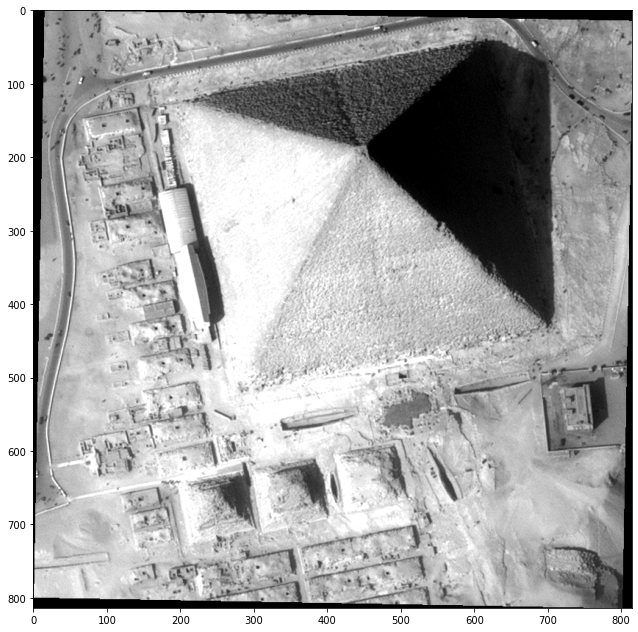

In [21]:
data_image_left = get_full_data(epipolar_image_left, "im")
show_data(data_image_left, mode="image")

###  Sparse matching: compute sifts

In [22]:
epipolar_matches_left, _ = sparse_matching_application.run(
    epipolar_image_left,
    epipolar_image_right,
    grid_left.attributes["disp_to_alt_ratio"],
    orchestrator=cars_orchestrator
)

### Grid correction: correct epipolar grids from sparse matches
Find correction to apply

#### Filter matches

In [23]:
matches_array = sparse_matching_application.filter_matches(
                            epipolar_matches_left,
                            orchestrator=cars_orchestrator)

Processing Tiles : [ epi_matches_left ] ...: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 41630.81it/s]


#### Estimate grid correction

In [24]:
(
    grid_correction_coef, 
    corrected_matches_array, _, _, _, _
) = grid_correction.estimate_right_grid_correction(
                    matches_array, grid_right)

### Grid correction: correct epipolar grids from sparse matches
Generate new right epipolar grid from correction

#### Correct right grid

In [25]:
corrected_grid_right = grid_correction.correct_grid(
                        grid_right, grid_correction_coef)

### Estimate disp min and disp max from sparse matches

In [26]:
dmin, dmax = sparse_matching_tools.derive_disparity_range_from_matches(
    corrected_matches_array,
    orchestrator=cars_orchestrator,
    disparity_margin=sparse_matching_application.get_disparity_margin(),
    disp_to_alt_ratio=grid_left.attributes["disp_to_alt_ratio"],
    disparity_outliers_rejection_percent=\
        sparse_matching_application.get_disp_out_reject_percent()
    )

### Compute margins used in dense matching, with corresponding disparity min and max

In [27]:
(
    dense_matching_margins, 
    disp_min, 
    disp_max
) = dense_matching_application.get_margins(
            grid_left, disp_min=dmin, disp_max=dmax)

###  Resampling: generate epipolar images with corrected grids and new margins

In [28]:
(
    new_epipolar_image_left, 
    new_epipolar_image_right
) = resampling_application.run(
        sensor_image_left,
        sensor_image_right,
        grid_left,
        corrected_grid_right,
        orchestrator=cars_orchestrator,
        margins=dense_matching_margins,
        optimum_tile_size=(
        dense_matching_application.get_optimal_tile_size(
            disp_min, disp_max
            )
        ),
        add_color=True,
    )

### Dense Matching: compute disparities with pandora

In [29]:
(
    epipolar_disparity_map_left, 
    epipolar_disparity_map_right
) = dense_matching_application.run(
        new_epipolar_image_left,
        new_epipolar_image_right,
        orchestrator=cars_orchestrator,
        disp_min=disp_min,
        disp_max=disp_max,
    )

### Show full disparity map

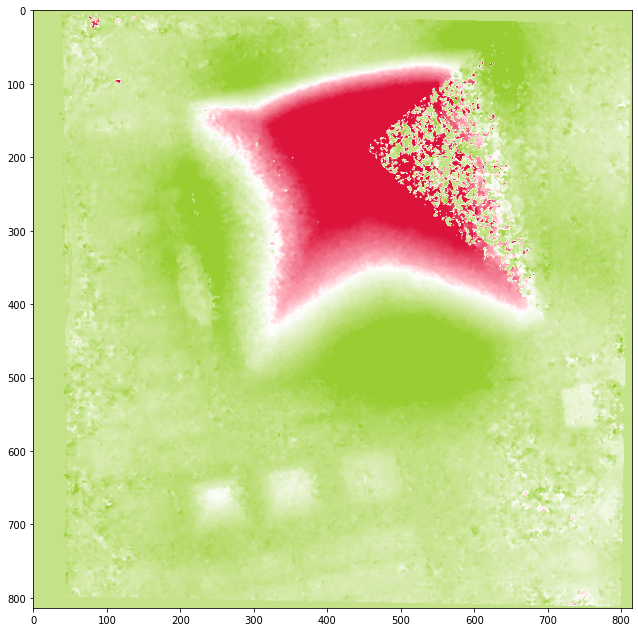

In [30]:
data_dispariy = get_full_data(epipolar_disparity_map_left, "disp")
show_data(data_dispariy)

### Compute epsg

In [31]:
epsg = preprocessing.compute_epsg(
    sensor_image_left, 
    sensor_image_right,
    grid_left,
    corrected_grid_right,
    triangulation_application.get_geometry_loader(),
    orchestrator=cars_orchestrator,
    srtm_dir=inputs[sens_cst.INITIAL_ELEVATION],
    default_alt=inputs[sens_cst.DEFAULT_ALT],
    disp_min=disp_min,
    disp_max=disp_max
)

### Triangulation : triangulate matches

In [32]:
(
    epipolar_points_cloud_left, 
    epipolar_points_cloud_right
) = triangulation_application.run(
        sensor_image_left,
        sensor_image_right,
        new_epipolar_image_left,
        new_epipolar_image_right,
        grid_left,
        corrected_grid_right,
        epipolar_disparity_map_left,
        epipolar_disparity_map_right,
        epsg,
        orchestrator=cars_orchestrator,
        uncorrected_grid_right=grid_right,
        geoid_path=inputs[sens_cst.GEOID],
        disp_min=disp_min,
        disp_max=disp_max,
    )

 ### Compute terrain bounding box

In [33]:
current_terrain_roi_bbox = preprocessing.compute_terrain_bbox(
    inputs[sens_cst.INITIAL_ELEVATION],
    inputs[sens_cst.DEFAULT_ALT],
    inputs[sens_cst.GEOID],
    sensor_image_left,
    sensor_image_right,
    new_epipolar_image_left,
    grid_left,
    corrected_grid_right,
    epsg,
    triangulation_application.get_geometry_loader(),
    resolution=rasterization_application.get_resolution(),
    disp_min=disp_min,
    disp_max=disp_max,
    orchestrator=cars_orchestrator
)
(
    terrain_bounds, 
    optimal_terrain_tile_width
) = preprocessing.compute_terrain_bounds(
        [current_terrain_roi_bbox],
        resolution=rasterization_application.get_resolution()
        )

 (0s)
 (0s)


### Transform point cloud to terrain point cloud

In [34]:
merged_points_clouds = pc_fusion_application.run(
    [epipolar_points_cloud_left],
    [epipolar_points_cloud_right],
    terrain_bounds,
    epsg,
    orchestrator=cars_orchestrator,
    margins=rasterization_application.get_margins(),
    optimal_terrain_tile_width=optimal_terrain_tile_width
)

### Point Cloud Outlier Removing : remove points with small components removing method

In [35]:
(
    filtered_sc_merged_points_clouds
) = pc_outlier_removing_small_comp_application.run(
        merged_points_clouds,
        orchestrator=cars_orchestrator)

         

### Point Cloud Outlier Removing: remove points with statistical removing method

In [36]:
(
    filtered_stats_merged_points_clouds
) = pc_outlier_removing_stats_application.run(
        filtered_sc_merged_points_clouds,
        orchestrator=cars_orchestrator)

### Rasterization : rasterize point cloud

In [37]:
dsm = rasterization_application.run(
    filtered_stats_merged_points_clouds,
    epsg,
    orchestrator=cars_orchestrator
)

### Show DSM


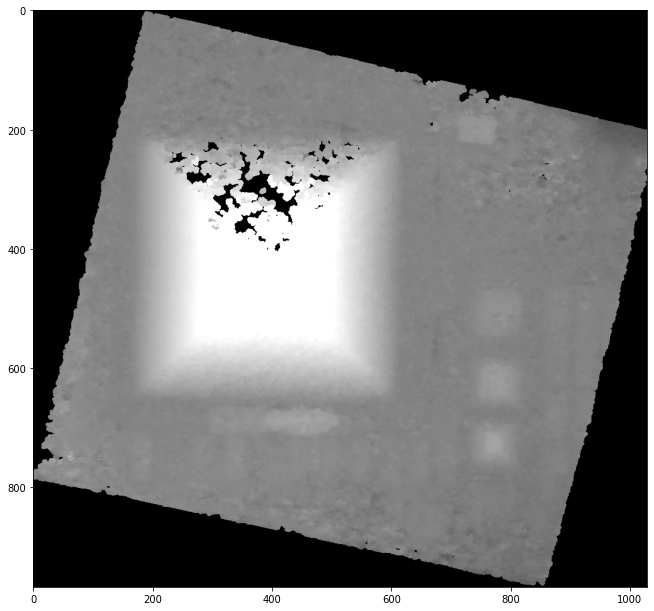

In [38]:
data_dsm = get_full_data(dsm, "hgt")
show_data(data_dsm, mode="dsm")

### Show ortho image

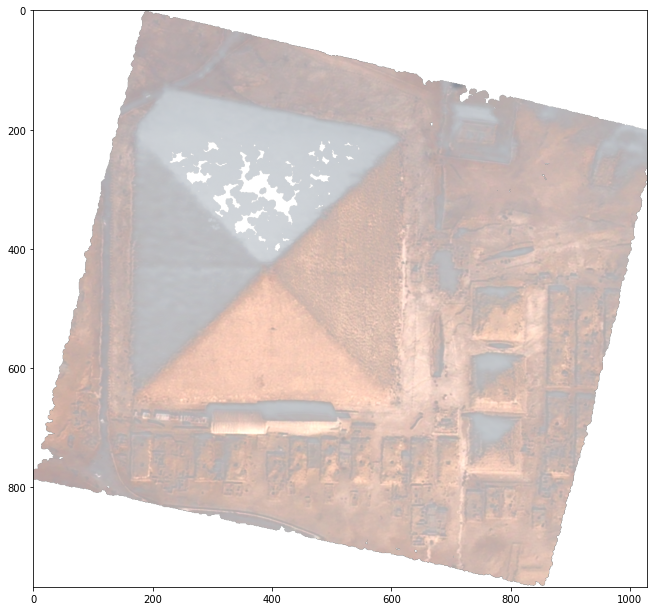

In [39]:
data_dsm = get_full_data(dsm, "img")
show_data(data_dsm, mode='image')


### Save DSM

In [40]:
save_data(dsm, os.path.join(output_dir, "dsm.tif"), "img")

<img src="images/picto_transparent.png" alt="CARS logo" width="100" align="right"/>

# CARS stereo matching with AI improvement

## New method presentation

<img alt="Pandora logo" src="images/logo_pandora.png" align="right" width="100"><br>

## Pandora dense matching pipeline

- Independent toolbox inspired by [1]
- Python implementation, except SGM C++ implementation
- API or CLI

Web site: [https://github.com/CNES/pandora](https://github.com/CNES/pandora)

[1] A Taxonomy and Evaluation of Dense Two-Frame Stereo Correspondence Algorithms, D. Scharstein and R. Szeliski, vol. 47, International Journal of Computer Vision, 2002

<img alt="pandora_overview" src="images/pandora_overview.png" align="left" width="80%"></br>

<img alt="Pandora logo" src="images/logo_pandora.png" align="right" width="100"><br>

## Pandora dense matching pipeline details

<img alt="pandora_pipeline" src="images/pandora_pipeline.png" align="right" width="150">

<img alt="pandora_methods" src="images/pandora_methods.png" align="left" width="50%">

## MC-CNN similarity measure

- mc-cnn [3] is a neural network which computes a similarity measure on pair of small image patches

- Implemented in <a href="https://github.com/CNES/Pandora_MCCNN">MC-CNN project</a> used by <a  href="https://github.com/CNES/Pandora"> Pandora</a> as <a href="https://github.com/CNES/Pandora_plugin_mccnn">plugin</a>

- Pretrained weights for mc-cnn neural networks are available in <a href="https://github.com/CNES/Pandora_plugin_mccnn">mc-ccnn plugin repository</a>

[3] Zbontar, J., & LeCun, Y. (2016). Stereo matching by training a convolutional neural network to compare image patches. J. Mach. Learn. Res., 17(1), 2287-2318.

## Run new method with CARS and results

Tutorial can be run through "sensor_to_full_resolution_dsm_matching_methods_comparison.ipynb" notebook directly (no presentation mode)

## Imports

In [1]:
# Notebook local imports

import os
import math
###
# Silent OTB info logs
os.environ['OTB_LOGGER_LEVEL']='WARNING'
import warnings
# Filter warnings
warnings.filterwarnings("ignore",category=UserWarning)
# import pretty print
import pprint 
pp = pprint.PrettyPrinter(indent=4)

# import external function for notebook
from notebook_helpers import get_full_data, show_data, save_data, get_dir_path, set_up_demo_inputs



In [2]:
# CARS imports

# Applications
from cars.applications.application import Application
from cars.applications.grid_generation import grid_correction
from cars.applications.sparse_matching import sparse_matching_tools

# Pipelines
import cars.pipelines.sensor_to_full_resolution_dsm.sensor_full_res_dsm_constants as sens_cst
from cars.pipelines.sensor_to_full_resolution_dsm import sensors_inputs
from cars.pipelines.sensor_to_full_resolution_dsm import dsm_output

# Conf, core, orchestrator
from cars.conf import log_conf
from cars.core import inputs, preprocessing
from cars.core.utils import safe_makedirs
from cars.orchestrator import orchestrator
from cars.core.utils import make_relative_path_absolute

---------

## Inputs/Outputs

### Define outputs

In [3]:
# Modify with your own output path if needed
output_dir = os.path.join(get_dir_path(), "output_notebook")
print(output_dir)

/work/scratch/fardetq/cars-hal/cars-0.4.2/tutorials/output_notebook


### Define inputs

In [4]:
# By default, the notebook use data_gizeh_small.tar.bz2, data_gizeh is available also (performance dependent).
# For you own data: Modify input_dir_path and modify all images, geometric models and color file names below
input_dir_path = set_up_demo_inputs("data_gizeh_small")

inputs_conf = {
    "sensors": {
        "left": {
            "image": os.path.join(input_dir_path, "img1.tif"),
            "geomodel": os.path.join(input_dir_path, "img1.geom"),
            "color": os.path.join(input_dir_path, "color1.tif"),
            "no_data": 0,


        },
        "right": {
            "image": os.path.join(input_dir_path, "img2.tif"),
            "geomodel": os.path.join(input_dir_path, "img2.geom"),
            "no_data": 0,
        },   
    },
    "pairing": [["left", "right"]],
    "initial_elevation": os.path.join(input_dir_path, "srtm_dir")
}

inputs = sensors_inputs.sensors_check_inputs(inputs_conf)
pp.pprint(inputs)

{   'check_inputs': False,
    'default_alt': 0,
    'epsg': None,
    'geoid': '/work/scratch/fardetq/cars-hal/cars-0.4.2/cars/pipelines/sensor_to_full_resolution_dsm/../../conf/geoid/egm96.grd',
    'initial_elevation': '/work/scratch/fardetq/cars-hal/cars-0.4.2/tutorials/data_gizeh_small/srtm_dir',
    'pairing': [['left', 'right']],
    'roi': None,
    'sensors': {   'left': {   'color': '/work/scratch/fardetq/cars-hal/cars-0.4.2/tutorials/data_gizeh_small/color1.tif',
                               'geomodel': '/work/scratch/fardetq/cars-hal/cars-0.4.2/tutorials/data_gizeh_small/img1.geom',
                               'geomodel_filters': None,
                               'image': '/work/scratch/fardetq/cars-hal/cars-0.4.2/tutorials/data_gizeh_small/img1.tif',
                               'mask': None,
                               'mask_classes': {   'ignored_by_dense_matching': None,
                                                   'ignored_by_sparse_matching': None,


### Create orchestrator


In [5]:
# Use sequential mode in notebook
orchestrator_conf = {"mode": "sequential"}
cars_orchestrator = orchestrator.Orchestrator(orchestrator_conf=orchestrator_conf, out_dir=output_dir)

---------

## First, compute epipolar rectified images 

In [6]:
epipolar_grid_generation_application = Application("grid_generation")

In [7]:
resampling_application = Application("resampling")

In [8]:
sparse_matching_application = Application("sparse_matching")

### Sensors images generation

From input configuration "inputs" seen before

In [9]:
_, sensor_image_left, sensor_image_right = sensors_inputs.generate_inputs(inputs)[0]

### Grid Generation : epipolar grid generation

In [10]:
grid_left, grid_right = epipolar_grid_generation_application.run(
    sensor_image_left,
    sensor_image_right,
    orchestrator=cars_orchestrator,
    srtm_dir=inputs[sens_cst.INITIAL_ELEVATION],
    default_alt=inputs[sens_cst.DEFAULT_ALT],
    geoid_path=inputs[sens_cst.GEOID],
)

Computing epipolar grids ...: 100% [**************************************************] (0s)




### Resampling : epipolar images generation


In [11]:
epipolar_image_left, epipolar_image_right = resampling_application.run(
    sensor_image_left,
    sensor_image_right,
    grid_left,
    grid_right,
    orchestrator=cars_orchestrator,
    margins=sparse_matching_application.get_margins()
)

###  Sparse matching: compute sifts

In [12]:
epipolar_matches_left, _ = sparse_matching_application.run(
    epipolar_image_left,
    epipolar_image_right,
    grid_left.attributes["disp_to_alt_ratio"],
    orchestrator=cars_orchestrator
)

### Grid correction: correct epipolar grids from sparse matches
Find correction to apply, and generate new right epipolar grid

#### Filter matches

In [13]:
matches_array = sparse_matching_application.filter_matches(epipolar_matches_left, orchestrator=cars_orchestrator)

Processing Tiles : [ epi_matches_left ] ...: 100%|██████████| 4/4 [00:00<00:00, 11382.10it/s]


#### Estimate grid correction

In [14]:
grid_correction_coef, corrected_matches_array,_, _, _, _ = grid_correction.estimate_right_grid_correction(matches_array, grid_right)

#### Correct right grid

In [15]:
corrected_grid_right = grid_correction.correct_grid(grid_right, grid_correction_coef)

### Estimate disp min and disp max from sparse matches

In [16]:
dmin, dmax = sparse_matching_tools.derive_disparity_range_from_matches(
    corrected_matches_array,
    orchestrator=cars_orchestrator,
    disparity_margin=sparse_matching_application.get_disparity_margin(),
    disp_to_alt_ratio=grid_left.attributes["disp_to_alt_ratio"],
    disparity_outliers_rejection_percent=sparse_matching_application.get_disp_out_reject_percent()
)

#### Compute margins used in dense matching, with corresponding disparity min and max

In [17]:
dense_matching_application = Application("dense_matching")
dense_matching_margins, disp_min, disp_max = dense_matching_application.get_margins(
    grid_left, disp_min=dmin, disp_max=dmax)

###  Resampling: generate epipolar images with corrected grids and new margins

In [18]:
new_epipolar_image_left, new_epipolar_image_right = resampling_application.run(
    sensor_image_left,
    sensor_image_right,
    grid_left,
    corrected_grid_right,
    orchestrator=cars_orchestrator,
    margins=dense_matching_margins,
    optimum_tile_size=(
        dense_matching_application.get_optimal_tile_size(
            disp_min, disp_max
        )
    ),
    add_color=True,
)

## Dense Matching: compute disparities with pandora by using two differents

### Census similarity measure with semi-global matching (default method)


In [19]:
dense_matching_census_application = Application("dense_matching")

In [20]:
epipolar_disparity_map_left_census, epipolar_disparity_map_right_census = dense_matching_census_application.run(
    new_epipolar_image_left,
    new_epipolar_image_right,
    orchestrator=cars_orchestrator,
    disp_min=disp_min,
    disp_max=disp_max,
)

#### Show full disparity map

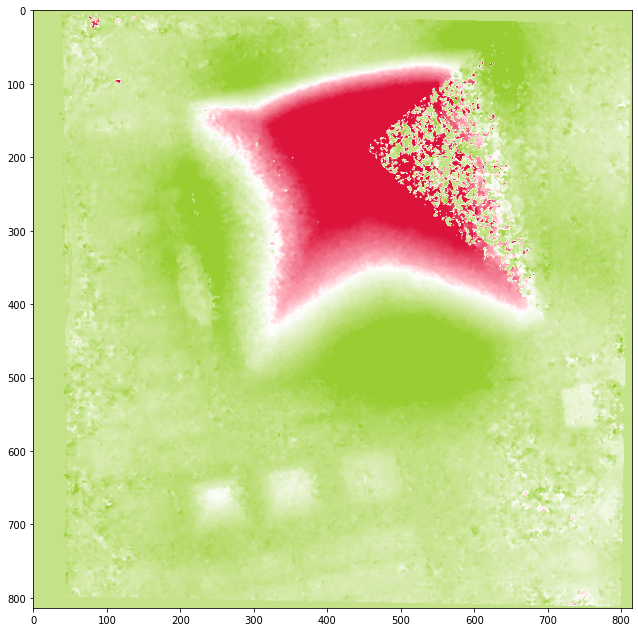

In [21]:
data_disparity_census = get_full_data(epipolar_disparity_map_left_census, "disp")
show_data(data_disparity_census)

### MC-CNN, the similarity measure produced by mc-cnn neural network

<a href="https://github.com/CNES/Pandora_MCCNN">MC-CNN algorithm</a> used by <a  href="https://github.com/CNES/Pandora"> Pandora</a> as <a href="https://github.com/CNES/Pandora_plugin_mccnn">plugin</a>

In [22]:
dense_matching_mccnn_application = Application("dense_matching", cfg={"method": "mccnn_sgm"})

In [23]:
epipolar_disparity_map_left_mccnn, epipolar_disparity_map_right_mccnn = dense_matching_mccnn_application.run(
    new_epipolar_image_left,
    new_epipolar_image_right,
    orchestrator=cars_orchestrator,
    disp_min=disp_min,
    disp_max=disp_max,
)

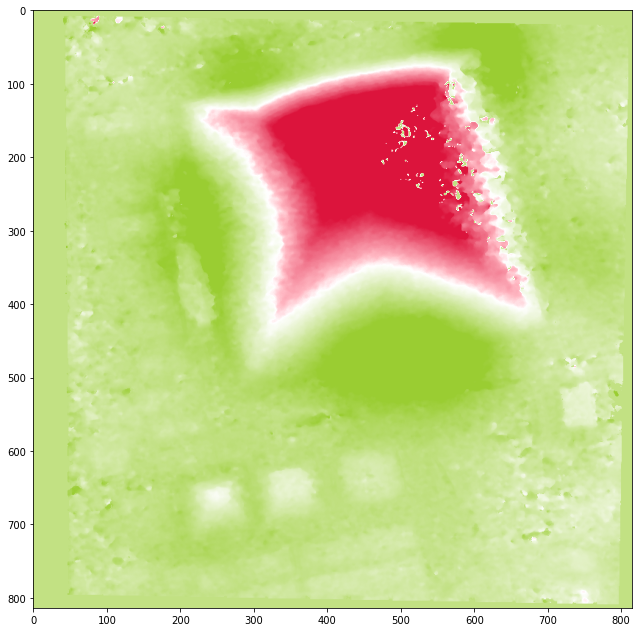

In [24]:
data_disparity_mccnn = get_full_data(epipolar_disparity_map_left_mccnn, "disp")
show_data(data_disparity_mccnn)

## Compute two DSM and compare them

One  from disparity map computed by Census similarity measure and the other from disparity map from MC-CNN similarity measure

In [25]:
triangulation_application = triangulation_application = Application("triangulation")

In [26]:
conf_outlier_removing_small_components = {"method": "small_components"}
pc_outlier_removing_small_comp_application = Application("point_cloud_outliers_removing", cfg=conf_outlier_removing_small_components)

In [27]:
conf_outlier_removing_small_statistical = {"method": "statistical"}
pc_outlier_removing_stats_application = Application("point_cloud_outliers_removing", cfg=conf_outlier_removing_small_statistical)

In [28]:
pc_fusion_application = Application("point_cloud_fusion")

In [29]:
conf_rasterization = { 
    "method": "simple_gaussian",
    "dsm_radius": 3,
    "sigma": 0.3
}
rasterization_application = Application("point_cloud_rasterization", cfg=conf_rasterization)

 Compute epsg

In [30]:
epsg = preprocessing.compute_epsg(
    sensor_image_left, 
    sensor_image_right,
    grid_left,
    corrected_grid_right,
    triangulation_application.get_geometry_loader(),
    orchestrator=cars_orchestrator,
    srtm_dir=inputs[sens_cst.INITIAL_ELEVATION],
    default_alt=inputs[sens_cst.DEFAULT_ALT],
    disp_min=disp_min,
    disp_max=disp_max
)

### Triangulation : triangulate matches

From census disparity map

In [31]:
epipolar_points_cloud_left_census, epipolar_points_cloud_right_census = triangulation_application.run(
    sensor_image_left,
    sensor_image_right,
    new_epipolar_image_left,
    new_epipolar_image_right,
    grid_left,
    corrected_grid_right,
    epipolar_disparity_map_left_census,
    epipolar_disparity_map_right_census,
    epsg,
    orchestrator=cars_orchestrator,
    uncorrected_grid_right=grid_right,
    geoid_path=inputs[sens_cst.GEOID],
    disp_min=disp_min,
    disp_max=disp_max,
)

From mccnn disparity map

In [32]:
epipolar_points_cloud_left_mccnn, epipolar_points_cloud_right_mccnn = triangulation_application.run(
    sensor_image_left,
    sensor_image_right,
    new_epipolar_image_left,
    new_epipolar_image_right,
    grid_left,
    corrected_grid_right,
    epipolar_disparity_map_left_mccnn,
    epipolar_disparity_map_right_mccnn,
    epsg,
    orchestrator=cars_orchestrator,
    uncorrected_grid_right=grid_right,
    geoid_path=inputs[sens_cst.GEOID],
    disp_min=disp_min,
    disp_max=disp_max,
)

 #### Compute terrain bounding box

In [33]:
current_terrain_roi_bbox = preprocessing.compute_terrain_bbox(
    inputs[sens_cst.INITIAL_ELEVATION],
    inputs[sens_cst.DEFAULT_ALT],
    inputs[sens_cst.GEOID],
    sensor_image_left,
    sensor_image_right,
    new_epipolar_image_left,
    grid_left,
    corrected_grid_right,
    epsg,
    triangulation_application.get_geometry_loader(),
    resolution=rasterization_application.get_resolution(),
    disp_min=disp_min,
    disp_max=disp_max,
    orchestrator=cars_orchestrator
)
terrain_bounds, optimal_terrain_tile_width = preprocessing.compute_terrain_bounds(
    [current_terrain_roi_bbox],
    resolution=rasterization_application.get_resolution()
)

 (0s)
 (0s)


#### Transform point cloud to terrain point cloud

From census disparity map

In [34]:
merged_points_clouds_census = pc_fusion_application.run(
    [epipolar_points_cloud_left_census],
    [epipolar_points_cloud_right_census],
    terrain_bounds,
    epsg,
    orchestrator=cars_orchestrator,
    margins=rasterization_application.get_margins(),
    optimal_terrain_tile_width=optimal_terrain_tile_width
)

From mccnn disparity map

In [35]:
merged_points_clouds_mccnn = pc_fusion_application.run(
    [epipolar_points_cloud_left_mccnn],
    [epipolar_points_cloud_right_mccnn],
    terrain_bounds,
    epsg,
    orchestrator=cars_orchestrator,
    margins=rasterization_application.get_margins(),
    optimal_terrain_tile_width=optimal_terrain_tile_width
)

### Point Cloud Outlier Removing : remove points with small components removing method

From census disparity map

In [36]:
filtered_sc_merged_points_clouds_census = pc_outlier_removing_small_comp_application.run(
    merged_points_clouds_census,
    orchestrator=cars_orchestrator,
)

From mccnn disparity map

In [37]:
filtered_sc_merged_points_clouds_mccnn = pc_outlier_removing_small_comp_application.run(
    merged_points_clouds_mccnn,
    orchestrator=cars_orchestrator,
)

### Point Cloud Outlier Removing: remove points with statistical removing method

From census disparity map

In [38]:
filtered_stats_merged_points_clouds_census = pc_outlier_removing_stats_application.run(
    filtered_sc_merged_points_clouds_census,
    orchestrator=cars_orchestrator,
)

From mccnn disparity map

In [39]:
filtered_stats_merged_points_clouds_mccnn = pc_outlier_removing_stats_application.run(
    filtered_sc_merged_points_clouds_mccnn,
    orchestrator=cars_orchestrator,
)

### Rasterization : rasterize point cloud

From census disparity map

In [40]:
dsm_census = rasterization_application.run(
    filtered_stats_merged_points_clouds_census,
    epsg,
    orchestrator=cars_orchestrator
)

From mccnn disparity map

In [41]:
dsm_mccnn = rasterization_application.run(
    filtered_stats_merged_points_clouds_mccnn,
    epsg,
    orchestrator=cars_orchestrator
)

### Show DSM


From census disparity map

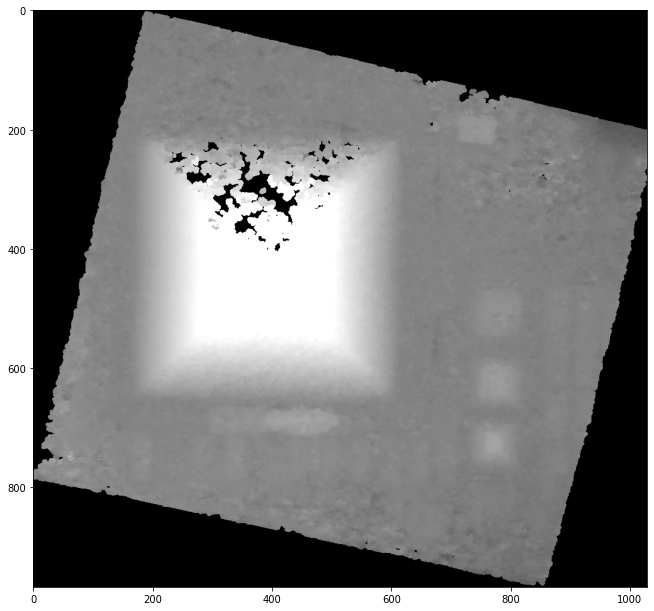

In [42]:
data_dsm_census = get_full_data(dsm_census, "hgt")
show_data(data_dsm_census, mode="dsm")

From mccnn disparity map

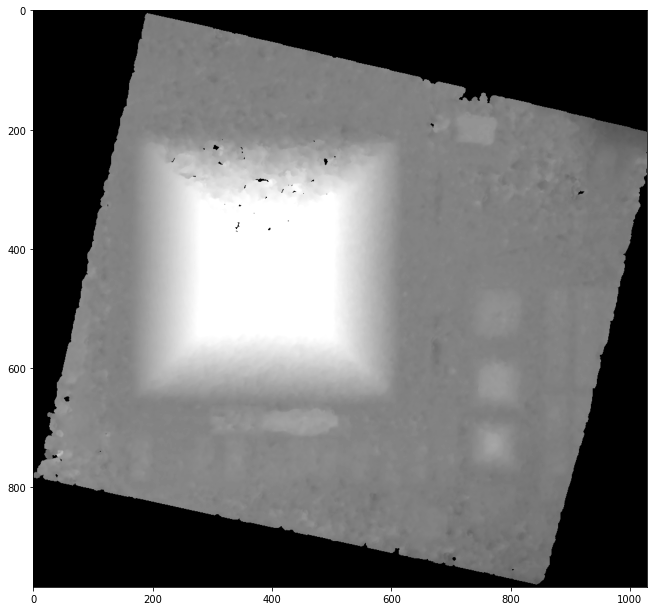

In [43]:
data_dsm_mccnn = get_full_data(dsm_mccnn, "hgt")
show_data(data_dsm_mccnn, mode="dsm")

### Show ortho image

From census disparity map

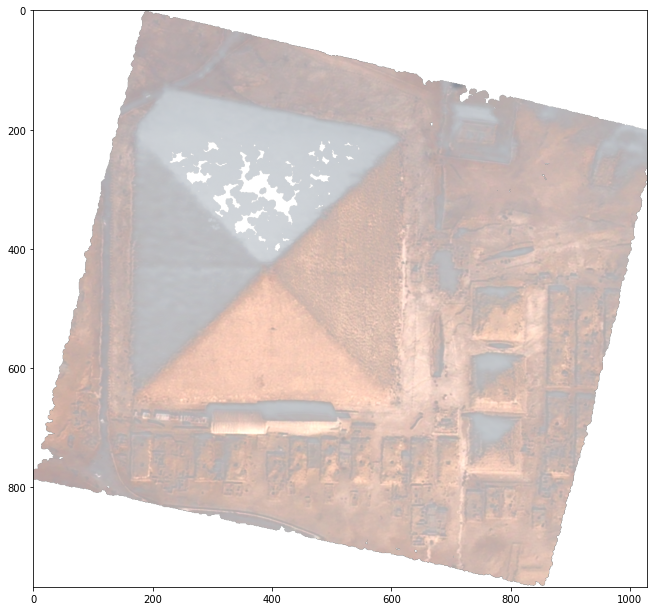

In [44]:
data_dsm_census = get_full_data(dsm_census, "img")
show_data(data_dsm_census, mode='image')


From mccnn disparity map

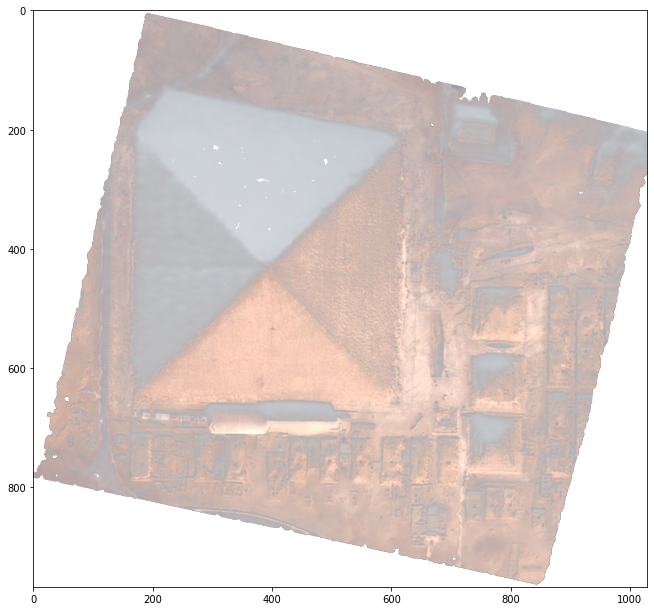

In [45]:
data_dsm_mccnn = get_full_data(dsm_mccnn, "img")
show_data(data_dsm_mccnn, mode='image')


# Thanks for your attention ! 

### Questions ?